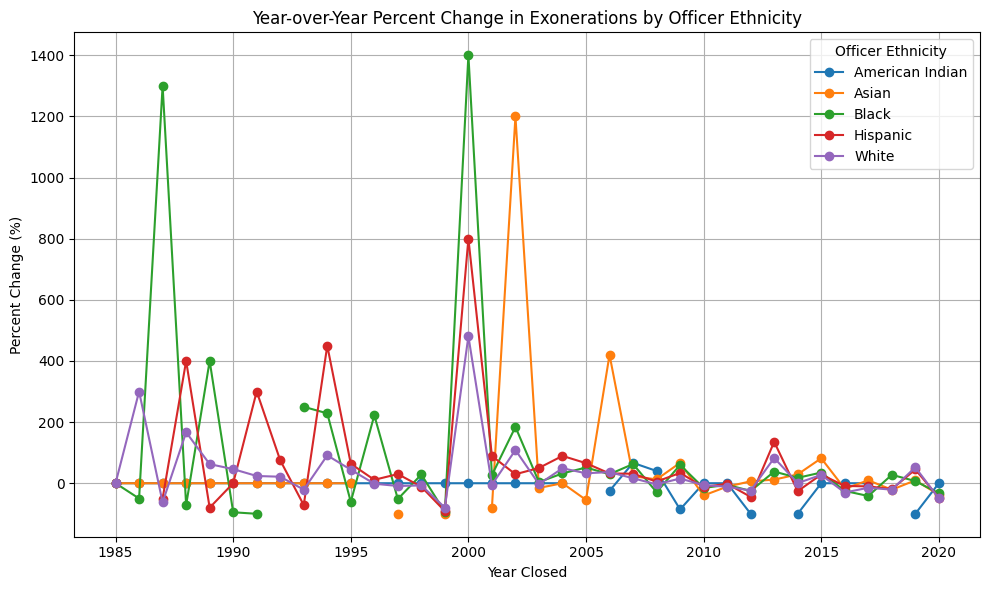

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Step 1: Define exonerations (i.e., not substantiated)
df['is_exonerated'] = ~df['board_disposition'].str.startswith("Substantiated")

# Step 2: Filter to only exonerated cases
exonerated_df = df[df['is_exonerated']]

# Step 3: Group by year_closed and ethnicity, count exonerations
year_ethnicity_counts = (
    exonerated_df
    .groupby(['year_closed', 'mos_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Step 4: Compute percent change year-to-year
percent_change = year_ethnicity_counts.pct_change().fillna(0) * 100

# Step 5: Plot
plt.figure(figsize=(10, 6))
for ethnicity in percent_change.columns:
    plt.plot(percent_change.index, percent_change[ethnicity], marker='o', label=ethnicity)

plt.title("Year-over-Year Percent Change in Exonerations by Officer Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Percent Change (%)")
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


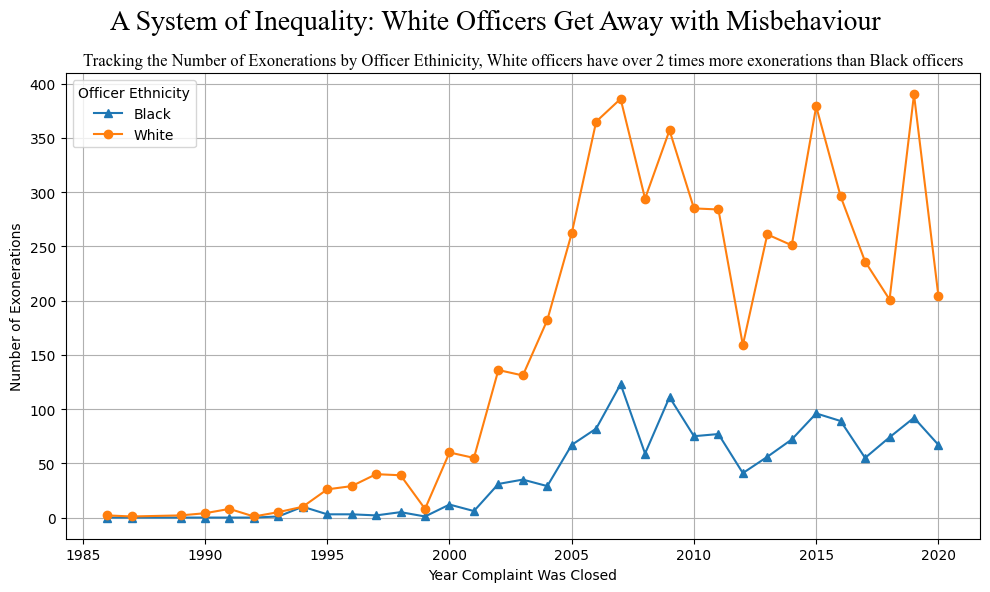

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Define exonerations (board_disposition NOT starting with "Substantiated")
df['is_exonerated'] = df['board_disposition'].str.startswith("Exonerated")

# Filter to only exonerated cases
exonerated_df = df[df['is_exonerated']]

# Group by year_closed and officer ethnicity, count number of exonerations
year_ethnicity_counts = (
    exonerated_df
    .groupby(['year_closed', 'mos_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Filter to only include 'Black' and 'White' officer ethnicities
year_ethnicity_counts = year_ethnicity_counts[['Black', 'White']]

# Plot total number of exonerations per year by ethnicity
plt.figure(figsize=(10, 6))
for ethnicity in year_ethnicity_counts.columns:
    marker = '^' if ethnicity == 'Black' else 'o'  # Use triangle marker for Black ethnicity
    plt.plot(year_ethnicity_counts.index, year_ethnicity_counts[ethnicity], marker=marker, label=ethnicity)

plt.suptitle("A System of Inequality: White Officers Get Away with Misbehaviour", fontsize=20, fontname='Times New Roman', ha = 'center')
plt.title("Tracking the Number of Exonerations by Officer Ethinicity, White officers have over 2 times more exonerations than Black officers", fontsize=12, fontname='Times New Roman', ha = 'center')
plt.xlabel("Year Complaint Was Closed")
plt.ylabel("Number of Exonerations")
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()



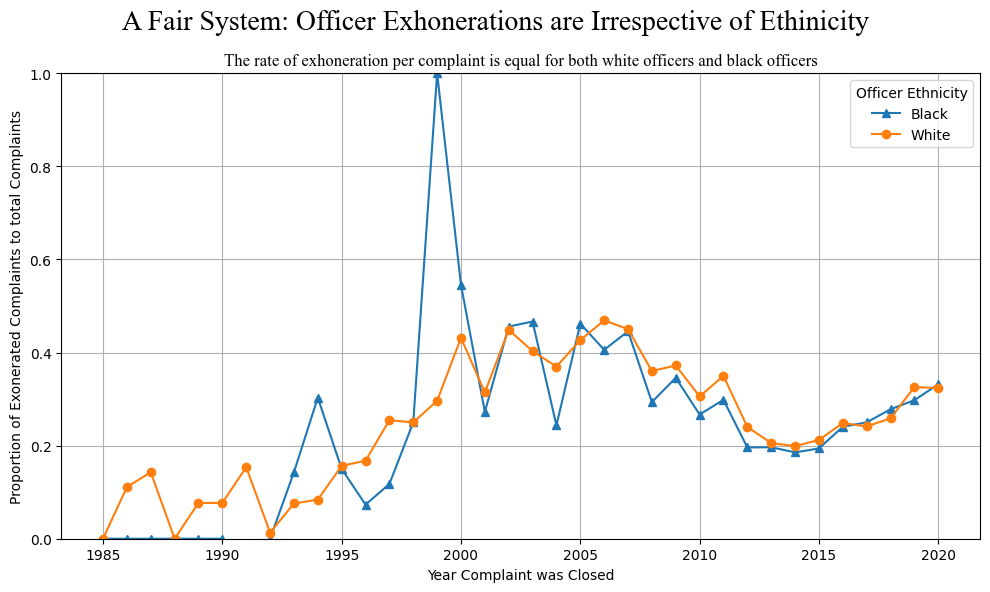

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (i.e., not substantiated)
df['is_exonerated'] = df['board_disposition'].str.startswith("Exonerated")

# Total complaints per year and ethnicity
total_complaints = df.groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Exonerated complaints per year and ethnicity
exonerated = df[df['is_exonerated']].groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Ensure same structure for division
exonerated = exonerated.reindex_like(total_complaints).fillna(0)

# Calculate proportion
proportion_exonerated = exonerated / total_complaints

# Filter to only include Black and White officers
proportion_exonerated = proportion_exonerated[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in proportion_exonerated.columns:
    marker = '^' if ethnicity == 'Black' else 'o'  # Use triangle marker for Black ethnicity
    plt.plot(proportion_exonerated.index, proportion_exonerated[ethnicity], marker=marker, label=ethnicity)

plt.suptitle("A Fair System: Officer Exhonerations are Irrespective of Ethinicity", fontsize=20, fontname='Times New Roman', ha = 'center')
plt.title("The rate of exhoneration per complaint is equal for both white officers and black officers", fontsize=12, fontname='Times New Roman', ha = 'center')
plt.xlabel("Year Complaint was Closed")
plt.ylabel("Proportion of Exonerated Complaints to All Complaints")
plt.ylim(0, 1)
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


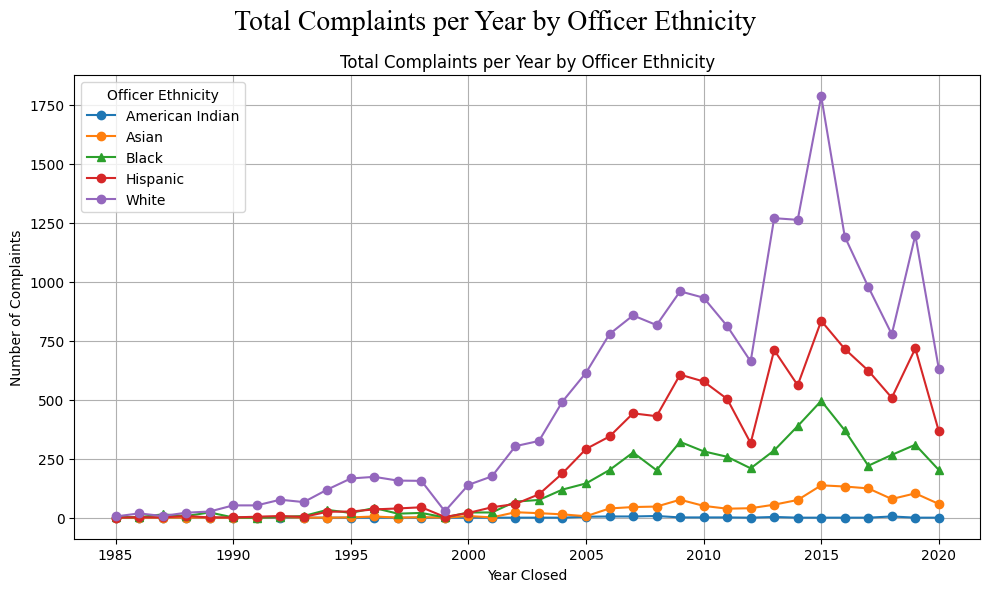

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Group by year_closed and officer ethnicity, then count complaints
complaints_by_year_ethnicity = (
    df.groupby(['year_closed', 'mos_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in complaints_by_year_ethnicity.columns:
    marker = '^' if ethnicity == 'Black' else 'o'  # Use triangle marker for Black ethnicity
    plt.plot(complaints_by_year_ethnicity.index, complaints_by_year_ethnicity[ethnicity], marker=marker, label=ethnicity)

plt.suptitle("Total Complaints per Year by Officer Ethnicity", fontsize=20, fontname='Times New Roman', ha = 'center')
plt.title("Total Complaints per Year by Officer Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Number of Complaints")
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


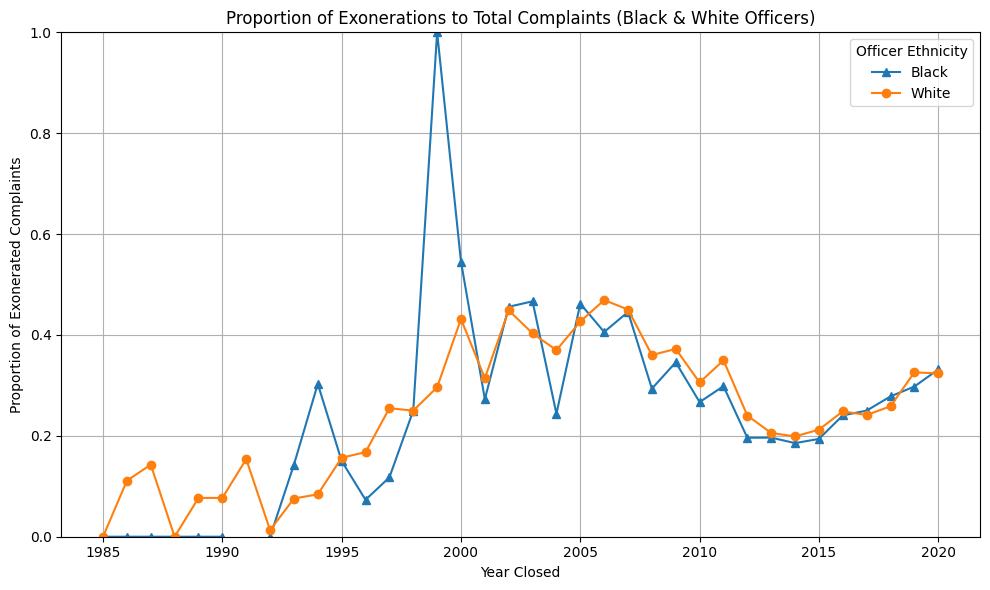

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (i.e., not substantiated)
df['is_exonerated'] = df['board_disposition'].str.startswith("Exonerated")

# Total complaints per year and ethnicity
total_complaints = df.groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Exonerated complaints per year and ethnicity
exonerated = df[df['is_exonerated']].groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Ensure same structure for division
exonerated = exonerated.reindex_like(total_complaints).fillna(0)

# Calculate proportion
proportion_exonerated = exonerated / total_complaints

# Filter to only include Black and White officers
proportion_exonerated = proportion_exonerated[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in proportion_exonerated.columns:
    marker = '^' if ethnicity == 'Black' else 'o'  # Use triangle marker for Black ethnicity
    plt.plot(proportion_exonerated.index, proportion_exonerated[ethnicity], marker=marker, label=ethnicity)

plt.title("Proportion of Exonerations to Total Complaints (Black & White Officers)")
plt.xlabel("Year Closed")
plt.ylabel("Proportion of Exonerated Complaints")
plt.ylim(0, 1)
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


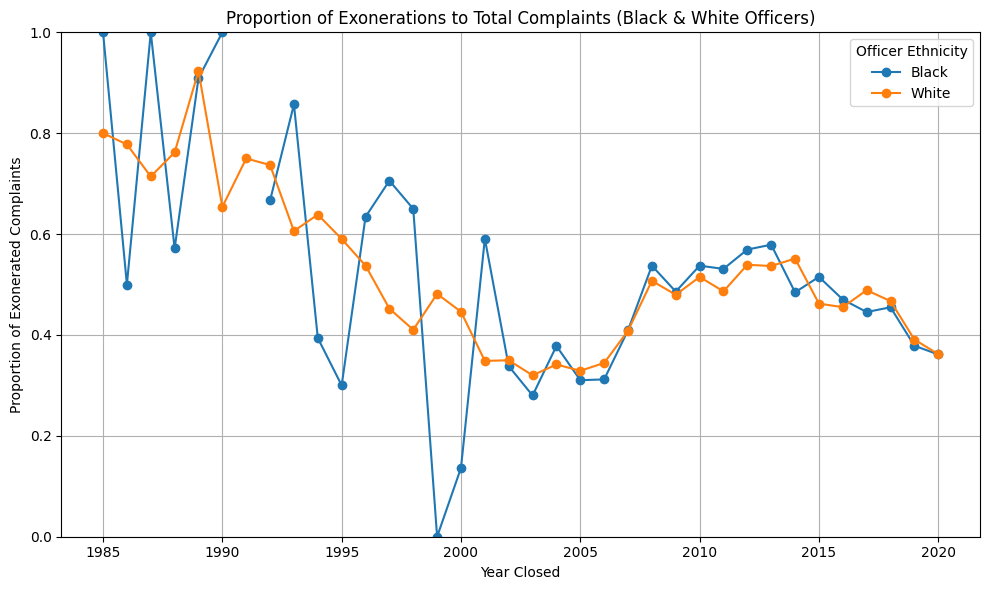

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (i.e., not substantiated)
df['is_exonerated'] = df['board_disposition'].str.startswith("Unsubstantiated")

# Total complaints per year and ethnicity
total_complaints = df.groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Exonerated complaints per year and ethnicity
exonerated = df[df['is_exonerated']].groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Ensure same structure for division
exonerated = exonerated.reindex_like(total_complaints).fillna(0)

# Calculate proportion
proportion_exonerated = exonerated / total_complaints

# Filter to only include Black and White officers
proportion_exonerated = proportion_exonerated[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in proportion_exonerated.columns:
    plt.plot(proportion_exonerated.index, proportion_exonerated[ethnicity], marker='o', label=ethnicity)

plt.title("Proportion of Exonerations to Total Complaints (Black & White Officers)")
plt.xlabel("Year Closed")
plt.ylabel("Proportion of Exonerated Complaints")
plt.ylim(0, 1)
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()




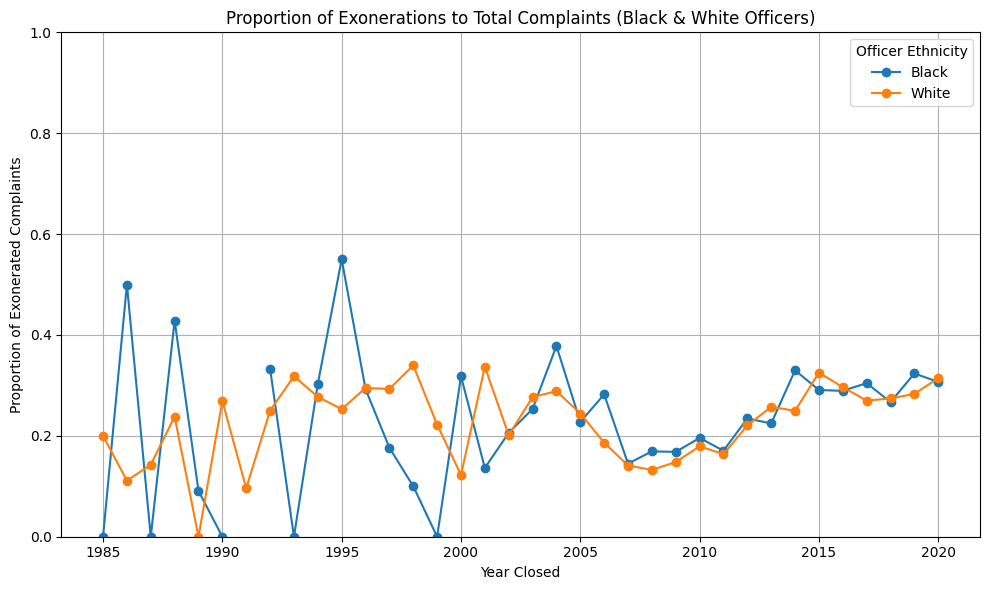

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (i.e., not substantiated)
df['is_exonerated'] = df['board_disposition'].str.startswith("Substantiated")

# Total complaints per year and ethnicity
total_complaints = df.groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Exonerated complaints per year and ethnicity
exonerated = df[df['is_exonerated']].groupby(['year_closed', 'mos_ethnicity']).size().unstack(fill_value=0)

# Ensure same structure for division
exonerated = exonerated.reindex_like(total_complaints).fillna(0)

# Calculate proportion
proportion_exonerated = exonerated / total_complaints

# Filter to only include Black and White officers
proportion_exonerated = proportion_exonerated[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in proportion_exonerated.columns:
    plt.plot(proportion_exonerated.index, proportion_exonerated[ethnicity], marker='o', label=ethnicity)

plt.title("Proportion of Exonerations to Total Complaints (Black & White Officers)")
plt.xlabel("Year Closed")
plt.ylabel("Proportion of Exonerated Complaints")
plt.ylim(0, 1)
plt.legend(title="Officer Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()




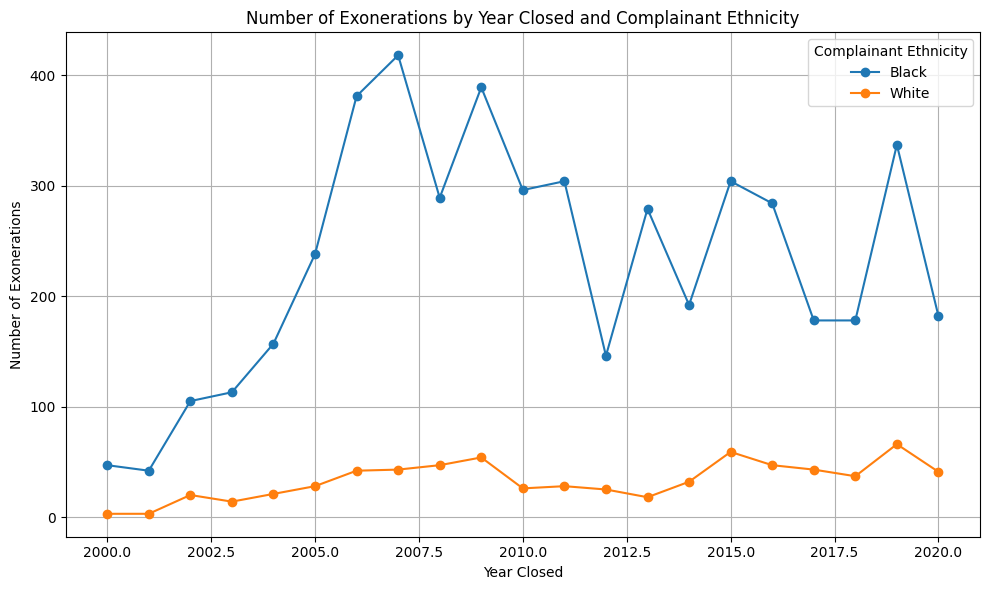

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (board_disposition NOT starting with "Substantiated")
df['is_exonerated'] = df['board_disposition'].str.startswith("Exonerated")

# Filter to only exonerated cases
exonerated_df = df[df['is_exonerated']]

# Group by year_closed and complainant_ethnicity, count exonerations
year_complainant_ethnicity_counts = (
    exonerated_df
    .groupby(['year_closed', 'complainant_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Filter to only include Black and White officers
year_complainant_ethnicity_counts = year_complainant_ethnicity_counts[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in year_complainant_ethnicity_counts.columns:
    plt.plot(
        year_complainant_ethnicity_counts.index,
        year_complainant_ethnicity_counts[ethnicity],
        marker='o',
        label=ethnicity
    )

plt.title("Number of Exonerations by Year Closed and Complainant Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Number of Exonerations")
plt.legend(title="Complainant Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


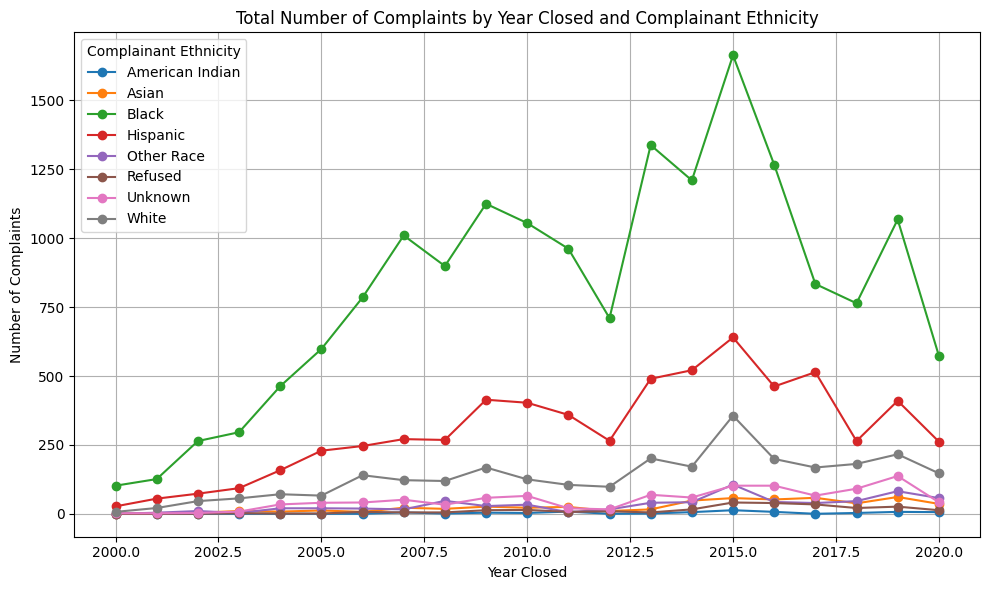

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Group by year_closed and complainant_ethnicity, count total complaints
total_complaints_by_year_ethnicity = (
    df.groupby(['year_closed', 'complainant_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in total_complaints_by_year_ethnicity.columns:
    plt.plot(
        total_complaints_by_year_ethnicity.index,
        total_complaints_by_year_ethnicity[ethnicity],
        marker='o',
        label=ethnicity
    )

plt.title("Total Number of Complaints by Year Closed and Complainant Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Number of Complaints")
plt.legend(title="Complainant Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


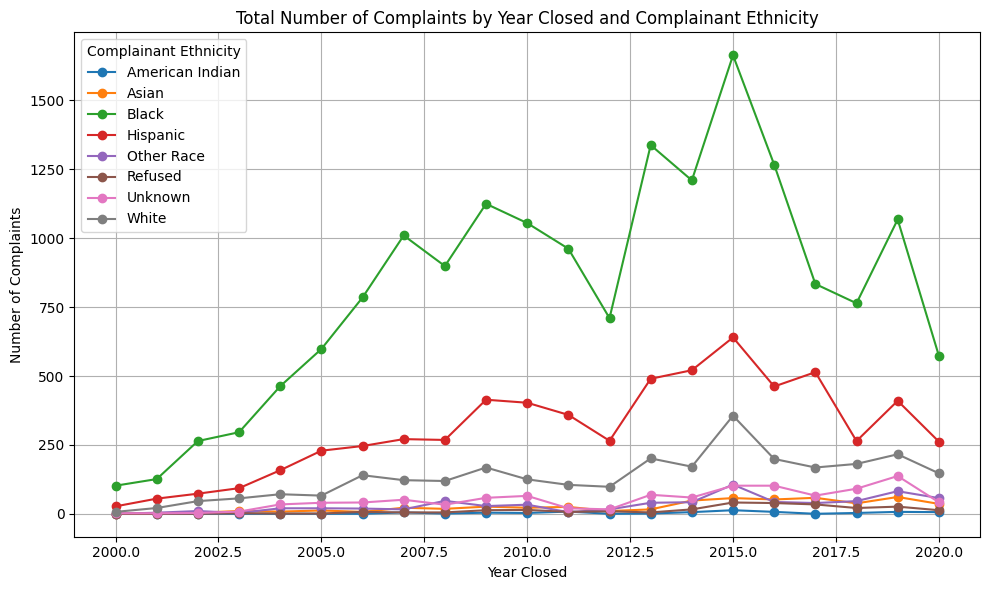

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Group by year_closed and complainant_ethnicity, count total complaints
total_complaints_by_year_ethnicity = (
    df.groupby(['year_closed', 'complainant_ethnicity'])
    .size()
    .unstack(fill_value=0)
)

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in total_complaints_by_year_ethnicity.columns:
    plt.plot(
        total_complaints_by_year_ethnicity.index,
        total_complaints_by_year_ethnicity[ethnicity],
        marker='o',
        label=ethnicity
    )

plt.title("Total Number of Complaints by Year Closed and Complainant Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Number of Complaints")
plt.legend(title="Complainant Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()


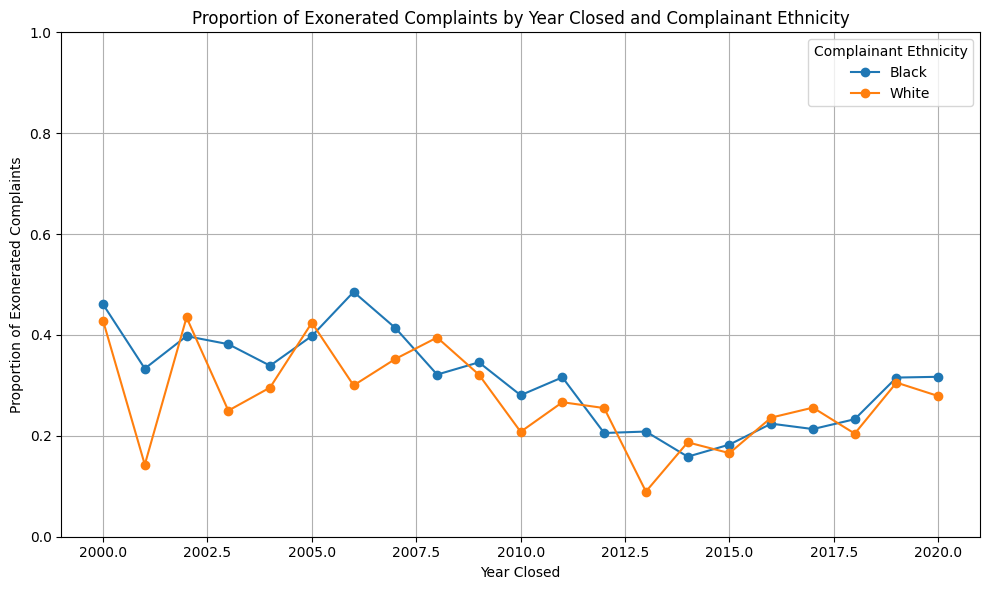

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("complaints.csv")

# Flag exonerations (i.e., not substantiated)
df['is_exonerated'] = df['board_disposition'].str.startswith("Exonerated")

# Total complaints per year and complainant ethnicity
total_complaints = df.groupby(['year_closed', 'complainant_ethnicity']).size().unstack(fill_value=0)

# Exonerated complaints per year and complainant ethnicity
exonerated = df[df['is_exonerated']].groupby(['year_closed', 'complainant_ethnicity']).size().unstack(fill_value=0)

# Ensure matching structure for division
exonerated = exonerated.reindex_like(total_complaints).fillna(0)

# Calculate proportion
proportion_exonerated = exonerated / total_complaints

# Filter to only include Black and White officers
proportion_exonerated = proportion_exonerated[['Black', 'White']]

# Plot
plt.figure(figsize=(10, 6))
for ethnicity in proportion_exonerated.columns:
    plt.plot(
        proportion_exonerated.index,
        proportion_exonerated[ethnicity],
        marker='o',
        label=ethnicity
    )

plt.title("Proportion of Exonerated Complaints by Year Closed and Complainant Ethnicity")
plt.xlabel("Year Closed")
plt.ylabel("Proportion of Exonerated Complaints")
plt.ylim(0, 1)
plt.legend(title="Complainant Ethnicity")
plt.grid(True)
plt.tight_layout()
plt.show()
